In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import anndata

plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# my code
%load_ext autoreload
%autoreload 2
from passenger.plot.plot import *


/home/vmarotl/anaconda3/envs/passenger/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
patient = "P2"
adata = anndata.read_h5ad("/home/vmarotl/fast/mutaseq/scripts/clonal_tracing_notebooks//processed_data/AML_MutaSeq/"+patient+".h5ad")


In [3]:
sort_by = pd.DataFrame(adata.obsm["C"], index = adata.obs_names)
row_ind = sort_by.sort_values([0],ascending=True).index # sort by know assignments
adata = adata[row_ind]

In [4]:
# define some helper for simplicity in plotting

VAF = (adata.layers["ALT"]/(adata.X))
VAF[adata.X<=2]=np.nan

clones = np.argmax(adata.obsm["C"], axis=1)
V = adata.varm["V"]
expressed = np.any(V>.0, axis=1)
for i in np.unique(clones): # only variants covered in both clones
    expressed &= np.sum(adata[clones==i].X>=2, axis=0)>(.2*np.sum(clones==i))

WE_cov = np.array([adata.var.cancer_cov,
                        adata.var.healthy_cov]
                        )

WE_VAF = (np.array([adata.var.cancer_alt,
                        adata.var.healthy_alt]
                        )/WE_cov).T
WE_VAF[WE_cov.T<=5]=np.nan

/home/vmarotl/anaconda3/envs/passenger/lib/python3.10/site-packages/anndata/_core/views.py:113: RuntimeWarning: invalid value encountered in divide
  results = super().__array_ufunc__(
/tmp/7178635.1.all.q/ipykernel_32335/592642631.py:16: RuntimeWarning: divide by zero encountered in divide
  WE_VAF = (np.array([adata.var.cancer_alt,
/tmp/7178635.1.all.q/ipykernel_32335/592642631.py:16: RuntimeWarning: invalid value encountered in divide
  WE_VAF = (np.array([adata.var.cancer_alt,


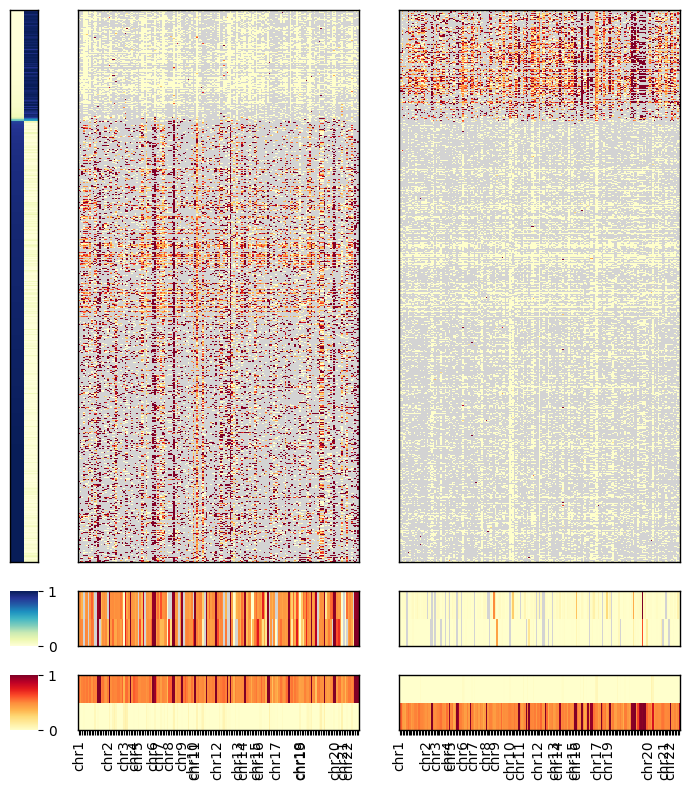

In [12]:
fig,((axs_0), (axs_1), (axs_2)) = plt.subplots(3,3,gridspec_kw={'height_ratios':[1,.1, .1],
                                                                      'width_ratios':[.1,1, 1]}, figsize=(7,8))
args = {"yticklabels":[], "vmin":0, "vmax":1, "cbar_ax":axs_2[0], "cmap":var_cmap}

#################
# plot C matrix # 
#################
g = sns.heatmap(adata.obsm["C"],cmap=cell_cmap, 
                 ax=axs_0[0],  xticklabels=[], yticklabels=[], vmin=0, vmax=1, cbar_ax=axs_1[0])
set_border(g)

#################################
# plot vars enriched in clone 0 # 
#################################
# get relevant variants
sub_vars = ((np.diff(V, axis=1)[:,0])<-.3) & (V[:,1]<.1)  # only high FC vars
sub_vars &= expressed
# plot VAF
g = sns.heatmap(VAF[:,sub_vars], ax=axs_0[1],  xticklabels=[], **args)
set_border(g)
# plot the variant weights
ylab = make_labels(adata[:,sub_vars])
g = sns.heatmap(V[sub_vars].T, ax=axs_2[1], xticklabels=ylab, **args)
set_border(g)
# plot the VAF in whole exome
g = sns.heatmap(WE_VAF[sub_vars].T, ax=axs_1[1], xticklabels=[], **args)
set_border(g)
    
#################################
# plot vars enriched in clone 1 # 
################################# 
sub_vars = ((np.diff(V, axis=1)[:,0])>.3) & (V[:,0]<.1) # only high FC vars
sub_vars &= expressed
# plot var subset
g = sns.heatmap(VAF[:,sub_vars], ax=axs_0[2],  xticklabels=[], **args)
set_border(g)
# plot the variant weights
ylab = make_labels(adata[:,sub_vars])
g = sns.heatmap(V[sub_vars].T, ax=axs_2[2], xticklabels=ylab, **args)
set_border(g)
# plot the VAF in whole exome
g = sns.heatmap(WE_VAF[sub_vars].T, ax=axs_1[2], xticklabels=[], **args)
set_border(g)

#################
# show and save # 
#################
plt.tight_layout()
save_path = "../figures/Fig3_P2-variants.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()
plt.close()

/tmp/7184812.1.all.q/ipykernel_18844/1203964350.py:18: RuntimeWarning: divide by zero encountered in divide
  sub_vars = (np.log2(WE_VAF[:,0]/WE_VAF[:,1])>4) & (WE_VAF[:,0]>0.04)
/tmp/7184812.1.all.q/ipykernel_18844/1203964350.py:18: RuntimeWarning: invalid value encountered in divide
  sub_vars = (np.log2(WE_VAF[:,0]/WE_VAF[:,1])>4) & (WE_VAF[:,0]>0.04)
/tmp/7184812.1.all.q/ipykernel_18844/1203964350.py:18: RuntimeWarning: divide by zero encountered in log2
  sub_vars = (np.log2(WE_VAF[:,0]/WE_VAF[:,1])>4) & (WE_VAF[:,0]>0.04)


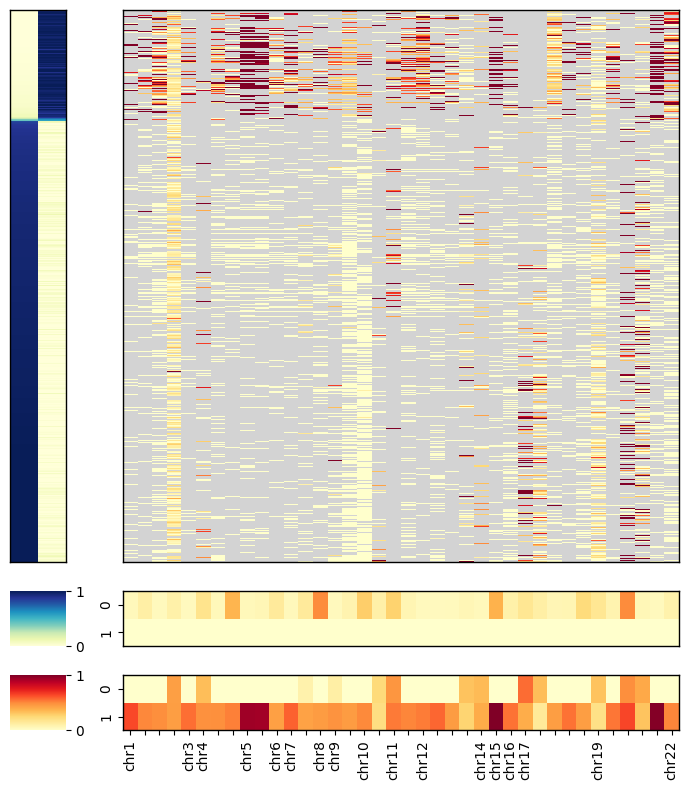

In [31]:
fig,((axs_0), (axs_1), (axs_2)) = plt.subplots(3,2,gridspec_kw={'height_ratios':[1,.1, .1],
                                                                      'width_ratios':[.1,1]}, figsize=(7,8))
args = {"vmin":0, "vmax":1, "cbar_ax":axs_2[0], "cmap":var_cmap}

#################
# plot C matrix # 
#################
g = sns.heatmap(adata.obsm["C"], ax=axs_0[0], 
                cmap=cell_cmap,  xticklabels=[], yticklabels=[], vmin=0, vmax=1, cbar_ax=axs_1[0])
set_border(g)



###################################
# plot vars enriched in WE cancer # 
###################################
# get relevant variants
sub_vars = (np.log2(WE_VAF[:,0]/WE_VAF[:,1])>4) & (WE_VAF[:,0]>0.04) 
# plot VAF
g = sns.heatmap(VAF[:,sub_vars], ax=axs_0[1], xticklabels=[], yticklabels=[], **args)
set_border(g)
# plot the variant weights
ylab = make_labels(adata[:,sub_vars])
g = sns.heatmap(V[sub_vars].T, ax=axs_2[1], xticklabels=ylab, **args)
set_border(g)
# plot the VAF in whole exome
g = sns.heatmap(WE_VAF[sub_vars].T, ax=axs_1[1], xticklabels=[], **args)
set_border(g)
    

#################
# show and save # 
#################
plt.tight_layout()
#save_path = "../figures/AML-S2_P2-WE-variants.pdf"
#fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()
plt.close()

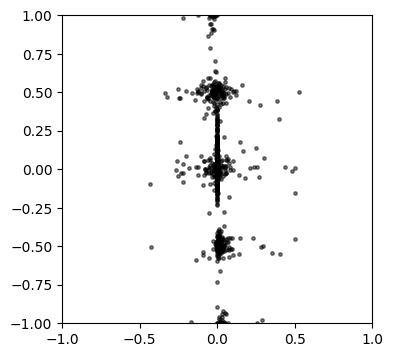

In [32]:
fig,ax = plt.subplots(1,1,figsize=(4,4))

plt.scatter((WE_VAF[:,0]-WE_VAF[:,1])[expressed], (V[:,0]-V[:,1])[expressed], alpha=.5, color="black", s=6)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
save_path = "../figures/S10_P2-weights.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

In [5]:
# save data and remove all donor cells (assigned to clone 1)

nondonor_adata = adata[adata.obsm["C"][:,1]<.2]
out_path = "/home/vmarotl/fast/mutaseq/raw_data/P2_nondonor/adata.h5ad"
REF, ALT = adata.layers["REF"], adata.layers["ALT"]
sub = np.sum((ALT + REF) >= 2, axis=0) > (ALT.shape[1] / 10)
nondonor_adata = nondonor_adata[:,sub]
nondonor_adata.write(out_path)
nondonor_adata.shape


# save for ploting:
donor_adata = adata[adata.obsm["C"][:,1]>.8]
donor_umap = donor_adata.obsm["umap"]

In [6]:
patient = "P2_nondonor"
adata = anndata.read_h5ad("/home/vmarotl/fast/mutaseq/scripts/clonal_tracing_notebooks/processed_data/AML_MutaSeq/"+patient+".h5ad")


In [10]:
leukemic_vars = ["NPM1", "X5999TC"]

mut = pd.read_csv("../ref_data/AML_MutaSeq/P2/P2_mut.csv", index_col=0).T[leukemic_vars]
ref = pd.read_csv("../ref_data/AML_MutaSeq/P2/P2_ref.csv", index_col=0).T[leukemic_vars]

leuk_COV = mut+ref
leuk_VAF = mut/leuk_COV

leuk_VAF[leuk_COV<=2]=np.nan

leuk_VAF = leuk_VAF.loc[adata.obs_names]

In [11]:
# ordering of cells for ease of comparison

C = adata.obsm["C"]
ref = adata.obsm["ref_assignments"][['PhiSICSpreleukemic', 'PhiSICScancer']]
sub_cells =np.abs(C[:,0]-C[:,1])>.3

C1 = ((C[:,0]>.5)*(ref<0.5).T).T
C2 = ((C[:,1]>.5)*(ref>0.5).T).T

row_ind = pd.concat((C1, C2, leuk_VAF>0), axis=1).loc[sub_cells]
row_ind.columns = np.arange(0, row_ind.shape[1])
row_ind = row_ind.sort_values(row_ind.columns.tolist(),ascending=True).index # sort by know assignments

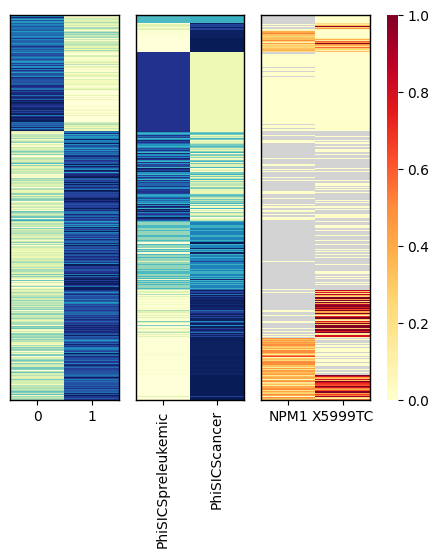

In [12]:
f,(axs) = plt.subplots(1,4,#3, 
            gridspec_kw={'width_ratios':[1,1, 1,0.1]}, figsize=(5,5))

args = {"cmap":cell_cmap, "cbar_ax":axs[-1], "yticklabels":[], "vmin":0, "vmax":1}

g0 = sns.heatmap(adata[row_ind].obsm["C"][:,[1,0]], ax=axs[0],  **args)
set_border(g0)

g1 = sns.heatmap(ref.loc[row_ind], ax=axs[1], **args ,
                #xticklabels = ["Healthy", "Preleukemic", "Cancer clone 1", "Cancer clone 2"]
                )
set_border(g1)

g2 = sns.heatmap(leuk_VAF.loc[row_ind], ax=axs[2], yticklabels=[], cbar_ax=axs[-1],
                 cmap=var_cmap)
set_border(g2)

plt.savefig("../figures/Fig3_P2-patient-cancer-vs-healthy.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()
plt.close()

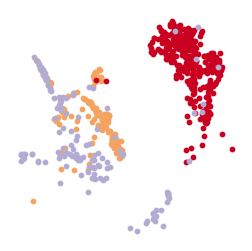

In [38]:
f,ax = plt.subplots(1,1, figsize=(3,3))
plt.scatter(donor_umap["UMAP_1"], donor_umap["UMAP_2"], color="sandybrown", s=10)

cancer_cells = adata.obs.cell_labels=="cancer"
healthy_cells = adata.obs.cell_labels=="healthy"
undetermined = adata.obs.cell_labels=="undetermined"

umap = adata[sub_cells].obsm["umap"]
plt.scatter(umap["UMAP_1"][undetermined], umap["UMAP_2"][undetermined], color="lightgrey", s=10)

plt.scatter(umap["UMAP_1"][cancer_cells], umap["UMAP_2"][cancer_cells], color="#ca0020", s=10)
plt.scatter(umap["UMAP_1"][healthy_cells], umap["UMAP_2"][healthy_cells], color="#b2abd2", s=10)

ax.axis('off')
plt.savefig("../figures/Fig3_P2-patient-cancer-vs-healthy_UMAP.pdf", bbox_inches='tight', format='pdf', dpi=300)
plt.show()
plt.close()

In [39]:
# define some helper for simplicity in plotting

adata = adata[row_ind]

VAF = (adata.layers["ALT"]/(adata.X))
VAF[adata.X<=2]=np.nan

clones = np.argmax(adata.obsm["C"], axis=1)
V = adata.varm["V"]
expressed = np.any(V>0, axis=1)
for i in np.unique(clones): # only variants covered in both clones
    expressed &= np.sum(adata[clones==i].X>=2, axis=0)>(.2*np.sum(clones==i))

WE_cov = np.array([adata.var.cancer_cov,
                        adata.var.healthy_cov]
                        )

WE_VAF = (np.array([adata.var.cancer_alt,
                        adata.var.healthy_alt]
                        )/WE_cov).T
WE_VAF[WE_cov.T<=10]=0

/home/vmarotl/anaconda3/envs/passenger/lib/python3.10/site-packages/anndata/_core/views.py:113: RuntimeWarning: invalid value encountered in divide
  results = super().__array_ufunc__(
/tmp/7184812.1.all.q/ipykernel_18844/4152593794.py:18: RuntimeWarning: invalid value encountered in divide
  WE_VAF = (np.array([adata.var.cancer_alt,


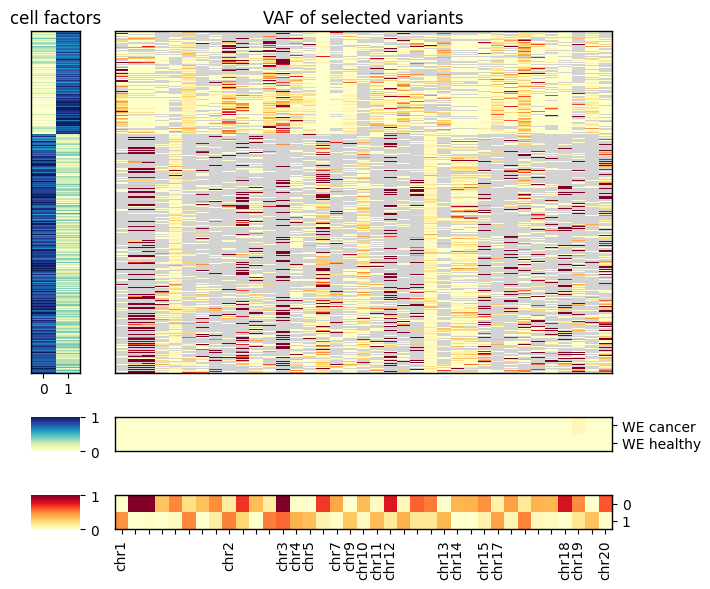

In [40]:
fig,((axs_0), (axs_1), (axs_2)) = plt.subplots(3,2,gridspec_kw={'height_ratios':[1,.1, .1],
                                                                      'width_ratios':[.1,1]}, figsize=(7,6))
args = {"vmin":0, "vmax":1, "cbar_ax":axs_2[0], "cmap":var_cmap}

#################
# plot C matrix # 
#################
g = sns.heatmap(adata.obsm["C"], ax=axs_0[0], 
                cmap=cell_cmap,  yticklabels=[], vmin=0, vmax=1, cbar_ax=axs_1[0])
axs_0[0].set_title("cell factors")
set_border(g)

###################################
# plot vars enriched in WE cancer # 
###################################
# get relevant variants
sub_vars = np.any(np.abs(np.diff(V, axis=1))>.3, axis=1)#(np.abs(np.log2(V[:,1]/V[:,0])))>4  # only high FC vars
sub_vars &= expressed
# plot VAF
g = sns.heatmap(VAF[:,sub_vars], ax=axs_0[1], yticklabels=[], xticklabels=[], **args)
axs_0[1].set_title("VAF of selected variants")
set_border(g)
# plot the variant weights
ylab = make_labels(adata[:,sub_vars])
g = sns.heatmap(V[sub_vars].T, ax=axs_2[1], xticklabels=ylab, **args)
axs_2[1].yaxis.tick_right() 
axs_2[1].set_yticks([i + 0.5 for i in range(adata.varm["V"].shape[1])])
axs_2[1].set_yticklabels(range(adata.varm["V"].shape[1]), rotation=0)
set_border(g)
# plot the VAF in whole exome
g = sns.heatmap(WE_VAF[sub_vars].T, ax=axs_1[1], xticklabels=[], **args)
axs_1[1].yaxis.tick_right() 
axs_1[1].set_yticks([i + 0.5 for i in range(2)])
axs_1[1].set_yticklabels(["WE cancer", "WE healthy"], rotation=0)
set_border(g)
    

#################
# show and save # 
#################
plt.tight_layout()
save_path = "../figures/S12_P2-nodonor-variants.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
plt.show()
plt.close()